In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.4.0
True


# PyTorch简介
两个核心特征：
- 多维张量，类似`Numpy`但是可以在`GPU`上运行
- 用于创建和训练神经网络的自动求导

## 张量

In [2]:
# 未初始化的张量，被创建，其值为该张量被分配的内存处的值
x = torch.empty(5, 3)
print(x)

tensor([[1.3001e+22, 2.4016e-18, 1.8788e+31],
        [7.9303e+34, 6.1949e-04, 7.3313e+22],
        [7.2151e+22, 2.8404e+29, 2.3089e-12],
        [7.1856e+22, 4.3605e+27, 2.5226e-18],
        [1.1257e+24, 1.4210e-05, 1.2849e+31]])


In [3]:
# 随机初始化的张量
x = torch.randn(5, 3)
print(x)

tensor([[-1.3541,  0.6688, -0.9737],
        [ 0.5310,  1.3178,  0.2240],
        [ 0.2307, -0.1250, -0.9171],
        [-0.6433,  0.0496, -0.2759],
        [ 0.1790,  2.0357,  0.2876]])


In [4]:
# 初始化为 0 的张量
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
# 从数组构建张量
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
# 基于已有张量创建
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.0765,  0.3583, -0.0196],
        [-0.1272, -0.1096,  0.5929],
        [ 0.3343, -1.5624, -2.0702],
        [ 0.2412, -1.1553,  1.0742],
        [ 0.3540, -0.7436,  0.0934]])


In [7]:
print(x.size())

torch.Size([5, 3])


## 张量操作

- `torch.mm`:支持严格意义的矩阵乘法，输入形状必须严格符合矩阵乘法规则
- `torch.matmul`:支持广播的矩阵乘法


- `tensor.reshape(m,n)`:返回维度为`m*n`的新张量，有时张量数据在内存中的地址未变，有时返回原张量的克隆；改变前后元素个数必须相同
- `tensor.resize_(m,n)`:就地改变，数据在内存中的位置未变；改后元素数量少于原张量，索引外元素会丢失；少于原张量，则多出部分元素未初始化;
- `tensor.view(m,n)`:返回新的张量，改变前后张量元素数量相同

In [8]:
# 操作符
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.0087,  0.5454,  0.2511],
        [ 0.1559,  0.5499,  1.5617],
        [ 0.4045, -1.0646, -1.6222],
        [ 0.5741, -0.3339,  1.6808],
        [ 1.0992, -0.1187,  1.0598]])


In [9]:
# torch函数
print(torch.add(x, y))

tensor([[ 0.0087,  0.5454,  0.2511],
        [ 0.1559,  0.5499,  1.5617],
        [ 0.4045, -1.0646, -1.6222],
        [ 0.5741, -0.3339,  1.6808],
        [ 1.0992, -0.1187,  1.0598]])


In [10]:
# 提供变量，接受操作结果为值
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.0087,  0.5454,  0.2511],
        [ 0.1559,  0.5499,  1.5617],
        [ 0.4045, -1.0646, -1.6222],
        [ 0.5741, -0.3339,  1.6808],
        [ 1.0992, -0.1187,  1.0598]])


In [11]:
# 就地操作，不创建新的变量
# 任何就地改变值的操作，以 _ 为后缀
y.add_(x)
print(y)

tensor([[ 0.0087,  0.5454,  0.2511],
        [ 0.1559,  0.5499,  1.5617],
        [ 0.4045, -1.0646, -1.6222],
        [ 0.5741, -0.3339,  1.6808],
        [ 1.0992, -0.1187,  1.0598]])


In [12]:
# 改变形状
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
# 张量的值
x.numpy()

array([[ 1.4732332 ,  1.5613918 ,  0.42412254,  0.4733341 ],
       [-0.07202843, -0.47456622,  2.0124426 ,  0.52497023],
       [ 0.1319841 , -1.8435042 ,  2.5339205 ,  0.9075786 ],
       [-0.41401067, -0.46745554,  1.7350237 ,  0.76257217]],
      dtype=float32)

## 与`Numpy`协作

In [14]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [15]:
# 改变张量的值，对应的Numpy数组的值也会改变
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [16]:
# 从Numpy数组创建张量，张量与数组共享内存
# 两者中任一改变，都会导致另一的改变

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)
np.add(a, 1, out=a)
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA张量
- 将张量移动到指定的设备上，张量的`.to`方法

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)  # 指定GPU创建张量
    x = x.to(device)  # 将张量移动到设备上
    z = x + y
    print(z)
    print(z.to("cpu"), torch.double)

tensor([[ 2.4732,  2.5614,  1.4241,  1.4733],
        [ 0.9280,  0.5254,  3.0124,  1.5250],
        [ 1.1320, -0.8435,  3.5339,  1.9076],
        [ 0.5860,  0.5325,  2.7350,  1.7626]], device='cuda:0')
tensor([[ 2.4732,  2.5614,  1.4241,  1.4733],
        [ 0.9280,  0.5254,  3.0124,  1.5250],
        [ 1.1320, -0.8435,  3.5339,  1.9076],
        [ 0.5860,  0.5325,  2.7350,  1.7626]]) torch.float64


# 利用`Numpy`和`PyTorch`手动实现神经网路

In [18]:
# Numpy实现
import numpy as np
N, D_in, H, D_out = 64, 1000, 100, 10  # 数据量、输入、隐藏层、输出层神经元

x = np.random.randn(N, D_in)  # 训练数据
y = np.random.randn(N, D_out)  # 训练标签

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # 前向传播
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)  # 激活函数
    y_pred = h_relu.dot(w2)

    # 损失函数
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # 反向传播
    grad_y_pred = 2.0 * (y_pred - y)
    
    grad_w2 = h_relu.T.dot(grad_y_pred)
    
    grad_h_relu = grad_y_pred.dot(w2.T)
    
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    
    grad_w1 = x.T.dot(grad_h)

    # 参数更新
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 25015766.30401914
100 790.992865714488
200 10.310933129055591
300 0.20151679512531337
400 0.004273137757451376


In [19]:
# PyTorch实现
import torch
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # 前向传播
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
        
    # 反向传播，手动计算
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # 更新参数
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2    

99 369.7817077636719
199 1.402687907218933
299 0.007994033396244049
399 0.00018907932098954916
499 3.431710138102062e-05


# 自动求导(`Autograd`)
- 使用`autograd`时，网络的前向传播会定义一个无环的计算图；图中结点是张量，边为函数    
- 将`Tensor`的`.requires_grad`设置为`True`，自动追踪作用于张量上的操作，然后调用`.backward()`方法，所有梯度会自动计算出，然后通过`.grad`属性访问
- `.detach()`方法将张量从计算历史中删除，阻止继续对其求导
    - 也可将代码包裹在`with torch.no_grad():`语句中阻止求导的进行，当模型训练完成，进行评估时很有用
- `Function`类，`Tensor`和`Function`互相连通，编码整个计算过程；每个张量有`.grad_fn`属性，指向创建该张量的`Function`
    - 用户自定义的张量`grad_fn`属性为`None`

函数$\vec{y}=f(\vec{x})$，张量$\vec{y}$对张量$\vec{x}$的梯度是一个雅各布(`Jacobian`)矩阵：
$$\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}$$
`torch.autograd`计算向量-雅各布点积，给定向量$v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$，计算$v^{T}\cdot J$，其中$v$恰好是标量函数$l=g\left(\vec{y}\right)$的梯度，即$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$,根据链式法则，向量-雅各布点积如下：
$$
\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}
$$

## `autograd`相关操作及属性

In [20]:
# requires_grad参数
x = torch.ones(2, 2, requires_grad=True)
print(x)

# grad_fn属性
y = x + 2
print(y)
print(y.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [21]:
# grad_fn属性
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [22]:
# requires_grad可以手动改变
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [23]:
# 张量的grad属性
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [24]:
# autograd.grad 函数手动求导，不要与backward()同时使用
# dx = torch.autograd.grad(out, x)
# print(dx)

In [25]:
# 张量的grad属性
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([-1023.8810,  1130.8076,   274.0225], grad_fn=<MulBackward0>)
tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


## 自动求导拟合多项式
例如：有来自于$ f(x) = 5x^2 + 3$数据集，需要拟合出该函数$f(x)$

In [26]:
# 数据集
def generate_data():
    x = torch.rand(100) * 20 - 10
    y = 5 * x * x + 3
    return x, y


def model(x):
    f = torch.stack([x * x, x, torch.ones_like(x)], 1)
    yhat = torch.squeeze(f @ w, 1)
    return yhat


def compute_loss(y, yhat):
    loss = torch.nn.functional.mse_loss(yhat, y)
    return loss


def train_step():
    x, y = generate_data()
    yhat = model(x)
    loss = compute_loss(yhat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()


w = torch.tensor(torch.randn([3, 1]), requires_grad=True)
opt = torch.optim.Adam([w], 0.1)
for _ in range(1000):
    train_step()
    
print(w.detach().numpy())

/home/yangbin7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[[4.9856863e+00]
 [1.7926495e-03]
 [3.8471248e+00]]


## 自动求导训练简单的神经网络

In [27]:
import torch
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2) # .clamp方法实现relu激活函数
    loss = (y_pred - y).pow(2).sum() # 张量先平方，再求和

    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

99 818.3245849609375
199 10.148862838745117
299 0.23177969455718994
399 0.006615933030843735
499 0.0004388819797895849


## 自定义自动求导函数
- `torch.autograd.Function`子类，实现`forward`和`backward`方法

In [29]:
import torch


class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_ouput):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    relu = MyReLU.apply()

    y_pred = relu(x.mm(w1)).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

TypeError: forward() missing 1 required positional argument: 'input'

# 神经网络


### 创建`Sequential`模型:

In [ ]:
import torch

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    model.zero_grad()

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

### 创建模型，继承自`nn.Module`模块

- `__init__`初始化定义各个层
- `forward`方法，模型的推导
    - 当使用`autograd`时，模型会自动创建`backward`方法
- 可学习的参数，`net.parameters()`    
- `torch.nn`只支持批量的数据，而不是单个数据，如`conv2d`层接受维度为`nSamples x nChannels x Height x Width`的张量
    - `input.unsqueeze(0)`给单个数据增加维度

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # 正方形的核，指定一个值也可以
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

In [ ]:
params = list(net.parameters())
print(len(params))  # 两个conv层的权重和偏置，三个fc层的权重和偏置
print(params[0].size())

In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

In [ ]:
net.zero_grad()  # 将梯度初始化为0
out.backward(torch.randn(1, 10))  # 提供随机的参数为梯度

- 损失函数
>整个网络的架构：
```
input-> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
     -> view -> linear -> relu -> linear -> relu -> linear
     -> MSELoss
     -> loss
```   

In [ ]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

In [ ]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

- 反向传播

In [ ]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

- 更新参数

In [ ]:
# python实现
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [ ]:
# 优化器
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

### 控制流和权重共享
- 定义特别的网络：全连接层后接多个隐藏层，前向传播时随机选择多个隐藏层来传播，重用权重

In [ ]:
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_layer = torch.nn.Linear(D_in, H)
        self.middle_layer = torch.nn.Linear(H, H)
        self.output_layer = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = self.input_layer(x).clamp(min=0)
        for _ in range(random.randint(1, 3)):  # 随机选择多个前向传播层，且共用参数
            h_relu = self.middle_layer(h_relu).clamp(min=0)
        y_pred = self.output_layer(h_relu)
        return y_pred


N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = DynamicNet(D_in, H, D_out)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    y_pred = model(x)

    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 创建图片分类器

### 加载数据

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
trainset = torchvision.datasets.CIFAR10(root='./datasets',
                                        train=True,
                                        download=False,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./datasets',
                                       train=False,
                                       download=False,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(" ".join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
images.shape

### 定义CNN模型

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 输入3通道，输出6通道，滤波器尺寸5
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

### 定义损失函数和优化器

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()  # 输入为每一类的原始权重，未经softmax标准化
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 训练模型

In [ ]:
for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # 反向传播

        optimizer.step()  # 参数更新

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
print("Finished Training")

In [ ]:
PATH = './models/cifar_net.pth'
torch.save(net.state_dict(), PATH)  # 保存权重

### 测试模型

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' %
      (100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' %
          (classes[i], 100 * class_correct[i] / class_total[i]))

### GPU上训练

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
net = Net()
net.to(device)

for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 4000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0
print("Finished Training")

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' %
          (classes[i], 100 * class_correct[i] / class_total[i]))

## 更高阶模型 
https://www.kaggle.com/aleksandradeis/classifying-cifar-10-images-with-densenet/notebook

In [ ]:
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=.40),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


def get_training_dataloader(train_transform,
                            batch_size=128,
                            num_workers=0,
                            shuffle=True):

    transform_train = train_transform
    cifar10_training = torchvision.datasets.CIFAR10(root='./datasets',
                                                    train=True,
                                                    download=False,
                                                    transform=transform_train)
    cifar10_training_loader = DataLoader(cifar10_training,
                                         shuffle=shuffle,
                                         num_workers=num_workers,
                                         batch_size=batch_size)

    return cifar10_training_loader


def get_testing_dataloader(test_transform,
                           batch_size=128,
                           num_workers=0,
                           shuffle=True):

    transform_test = test_transform
    cifar10_test = torchvision.datasets.CIFAR10(root='./datasets',
                                                train=False,
                                                download=False,
                                                transform=transform_test)
    cifar10_test_loader = DataLoader(cifar10_test,
                                     shuffle=shuffle,
                                     num_workers=num_workers,
                                     batch_size=batch_size)

    return cifar10_test_loader


trainloader = get_training_dataloader(train_transform)
testloader = get_testing_dataloader(test_transform)

In [ ]:
classes_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for batch_idx, (inputs, labels) in enumerate(trainloader):
    for im in range(25):
        image = inputs[im].permute(1, 2, 0)
        i = im // 5
        j = im % 5
        axs[i, j].imshow(image.numpy())
        axs[i, j].axis('off')
        axs[i, j].set_title(classes_dict[int(labels[im].numpy())])
    break
plt.suptitle('CIFAR-10 Images')
plt.show()

In [ ]:
#"""Bottleneck layers. Although each layer only produces k
#output feature-maps, it typically has many more inputs. It
#has been noted in [37, 11] that a 1×1 convolution can be in-
#troduced as bottleneck layer before each 3×3 convolution
#to reduce the number of input feature-maps, and thus to
#improve computational efficiency."""
class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        #"""In  our experiments, we let each 1×1 convolution
        #produce 4k feature-maps."""
        inner_channel = 4 * growth_rate

        #"""We find this design especially effective for DenseNet and
        #we refer to our network with such a bottleneck layer, i.e.,
        #to the BN-ReLU-Conv(1×1)-BN-ReLU-Conv(3×3) version of H ` ,
        #as DenseNet-B."""
        self.bottle_neck = nn.Sequential(
            nn.BatchNorm2d(in_channels), nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, inner_channel, kernel_size=1, bias=False),
            nn.BatchNorm2d(inner_channel), nn.ReLU(inplace=True),
            nn.Conv2d(inner_channel,
                      growth_rate,
                      kernel_size=3,
                      padding=1,
                      bias=False))

    def forward(self, x):
        return torch.cat([x, self.bottle_neck(x)], 1)


#"""We refer to layers between blocks as transition
#layers, which do convolution and pooling."""
class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        #"""The transition layers used in our experiments
        #consist of a batch normalization layer and an 1×1
        #convolutional layer followed by a 2×2 average pooling
        #layer""".
        self.down_sample = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.Conv2d(in_channels, out_channels, 1, bias=False),
            nn.AvgPool2d(2, stride=2))

    def forward(self, x):
        return self.down_sample(x)


#DesneNet-BC
#B stands for bottleneck layer(BN-RELU-CONV(1x1)-BN-RELU-CONV(3x3))
#C stands for compression factor(0<=theta<=1)
class DenseNet(nn.Module):
    def __init__(self,
                 block,
                 nblocks,
                 growth_rate=12,
                 reduction=0.5,
                 num_class=10):
        super().__init__()
        self.growth_rate = growth_rate

        #"""Before entering the first dense block, a convolution
        #with 16 (or twice the growth rate for DenseNet-BC)
        #output channels is performed on the input images."""
        inner_channels = 2 * growth_rate

        #For convolutional layers with kernel size 3×3, each
        #side of the inputs is zero-padded by one pixel to keep
        #the feature-map size fixed.
        self.conv1 = nn.Conv2d(3,
                               inner_channels,
                               kernel_size=3,
                               padding=1,
                               bias=False)

        self.features = nn.Sequential()

        for index in range(len(nblocks) - 1):
            self.features.add_module(
                "dense_block_layer_{}".format(index),
                self._make_dense_layers(block, inner_channels, nblocks[index]))
            inner_channels += growth_rate * nblocks[index]

            #"""If a dense block contains m feature-maps, we let the
            #following transition layer generate θm output feature-
            #maps, where 0 < θ ≤ 1 is referred to as the compression
            #fac-tor.
            out_channels = int(
                reduction *
                inner_channels)  # int() will automatic floor the value
            self.features.add_module("transition_layer_{}".format(index),
                                     Transition(inner_channels, out_channels))
            inner_channels = out_channels

        self.features.add_module(
            "dense_block{}".format(len(nblocks) - 1),
            self._make_dense_layers(block, inner_channels,
                                    nblocks[len(nblocks) - 1]))
        inner_channels += growth_rate * nblocks[len(nblocks) - 1]
        self.features.add_module('bn', nn.BatchNorm2d(inner_channels))
        self.features.add_module('activation', nn.ReLU(inplace=True))

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.linear = nn.Linear(inner_channels, num_class)

    def forward(self, x):
        output = self.conv1(x)
        output = self.features(output)
        output = self.avgpool(output)
        output = output.view(output.size()[0], -1)
        output = self.linear(output)
        return output

    def _make_dense_layers(self, block, in_channels, nblocks):
        dense_block = nn.Sequential()
        for index in range(nblocks):
            dense_block.add_module('bottle_neck_layer_{}'.format(index),
                                   block(in_channels, self.growth_rate))
            in_channels += self.growth_rate
        return dense_block


def densenet121(activation='relu'):
    return DenseNet(Bottleneck, [6, 12, 24, 16], growth_rate=32)


def densenet169(activation='relu'):
    return DenseNet(Bottleneck, [6, 12, 32, 32], growth_rate=32)


def densenet201(activation='relu'):
    return DenseNet(Bottleneck, [6, 12, 48, 32], growth_rate=32)


def densenet161(activation='relu'):
    return DenseNet(Bottleneck, [6, 12, 36, 24], growth_rate=48)

In [ ]:
epochs = 50
# learning rate
learning_rate = 0.001
# device to use
# don't forget to turn on GPU on kernel's settings
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
device

In [ ]:
model = densenet121()

In [ ]:
from torch.optim import Adam
criterion = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr=learning_rate)

In [ ]:
import pandas as pd
train_stats = pd.DataFrame(columns=[
    'Epoch', 'Time per epoch', 'Avg time per step', 'Train loss',
    'Train accuracy', 'Train top-3 accuracy', 'Test loss', 'Test accuracy',
    'Test top-3 accuracy'
])

In [ ]:
import time

#train the model
model.to(device)

steps = 0
running_loss = 0
for epoch in range(epochs):

    since = time.time()

    train_accuracy = 0
    top3_train_accuracy = 0
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # calculate train top-1 accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        train_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        # Calculate train top-3 accuracy
        np_top3_class = ps.topk(3, dim=1)[1].cpu().numpy()
        target_numpy = labels.cpu().numpy()
        top3_train_accuracy += np.mean([
            1 if target_numpy[i] in np_top3_class[i] else 0
            for i in range(0, len(target_numpy))
        ])

    time_elapsed = time.time() - since

    test_loss = 0
    test_accuracy = 0
    top3_test_accuracy = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

            test_loss += batch_loss.item()

            # Calculate test top-1 accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            # Calculate test top-3 accuracy
            np_top3_class = ps.topk(3, dim=1)[1].cpu().numpy()
            target_numpy = labels.cpu().numpy()
            top3_test_accuracy += np.mean([
                1 if target_numpy[i] in np_top3_class[i] else 0
                for i in range(0, len(target_numpy))
            ])

    print(
        f"Epoch {epoch+1}/{epochs}.. "
        f"Time per epoch: {time_elapsed:.4f}.. "
        f"Average time per step: {time_elapsed/len(trainloader):.4f}.. "
        f"Train loss: {running_loss/len(trainloader):.4f}.. "
        f"Train accuracy: {train_accuracy/len(trainloader):.4f}.. "
        f"Top-3 train accuracy: {top3_train_accuracy/len(trainloader):.4f}.. "
        f"Test loss: {test_loss/len(testloader):.4f}.. "
        f"Test accuracy: {test_accuracy/len(testloader):.4f}.. "
        f"Top-3 test accuracy: {top3_test_accuracy/len(testloader):.4f}")

    train_stats = train_stats.append(
        {
            'Epoch': epoch,
            'Time per epoch': time_elapsed,
            'Avg time per step': time_elapsed / len(trainloader),
            'Train loss': running_loss / len(trainloader),
            'Train accuracy': train_accuracy / len(trainloader),
            'Train top-3 accuracy': top3_train_accuracy / len(trainloader),
            'Test loss': test_loss / len(testloader),
            'Test accuracy': test_accuracy / len(testloader),
            'Test top-3 accuracy': top3_test_accuracy / len(testloader)
        },
        ignore_index=True)

    running_loss = 0
    model.train()
    
# train_stats.to_csv('train_log_DenseNet121.csv')    

In [ ]:
PATH = './models/cifar_net.pth'
torch.save(model.state_dict(), PATH) 

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

x = range(1, len(train_stats['Train loss'].values) + 1)
ax.plot(x, train_stats['Train loss'].values, '-g', label='train loss')
ax.plot(x, train_stats['Test loss'].values, '-b', label='test loss')

plt.legend()

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

x = range(1, len(train_stats['Train accuracy'].values) + 1)
ax.plot(x, train_stats['Train accuracy'].values, '-g', label='train accuracy');
ax.plot(x, train_stats['Test accuracy'].values, '-b', label='test accuracy');

plt.legend()

In [ ]:
def view_classify(img, ps, title):
    """
    Function for viewing an image and it's predicted classes
    with matplotlib.

    INPUT:
        img - (tensor) image file
        ps - (tensor) predicted probabilities for each class
        title - (str) string with true label
    """
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    image = img.permute(1, 2, 0)
    ax1.imshow(image.numpy())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(list(classes_dict.values()), size='small')
    ax2.set_title(title)
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    plt.show()

In [ ]:
for batch_idx, (inputs, labels) in enumerate(testloader):
    inputs, labels = inputs.to(device), labels.to(device)
    img = inputs[0]
    label_true = labels[0]
    ps = model(inputs)
    view_classify(img.cpu(), torch.softmax(ps[0].cpu(), dim=0), classes_dict[int(label_true.cpu().numpy())])
    
    break;

In [ ]:
import torch


In [ ]:
x = torch.tensor(1.0, requires_grad=True)


def u(x):
    return x * x


def g(u):
    return -u

In [ ]:
dgdx = torch.autograd.grad(g(u(x)),x)
print(dgdx)

In [ ]:
y = g(u(x))
y.backward()

In [ ]:
y.grad

In [ ]:
u.grad

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [2]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

y = w * x + b
y.backward()

In [3]:
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


- 前向传播自动进行；反向求梯度，必须指定张量的`requires_grad`属性，并调用`.backward()`方法

- `nn`模块内置层，默认设置了`requires_gras=True`
    - `nn.Linear`类的`weight`和`bias`属性

In [5]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

linear = nn.Linear(3, 2)
print("w:", linear.weight)
print("b:", linear.bias)

w: Parameter containing:
tensor([[-0.0129, -0.1627, -0.3308],
        [ 0.1463,  0.3797, -0.5309]], requires_grad=True)
b: Parameter containing:
tensor([0.5564, 0.1864], requires_grad=True)


In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

pred = linear(x)

loss = criterion(pred, y)
print("loss:", loss.item())

loss.backward()

print("dL/dw", linear.weight.grad)
print("dL/db", linear.bias.grad)

loss: 1.9151089191436768
dL/dw tensor([[-0.2434, -0.1086, -0.7133],
        [ 0.2724, -0.0422, -1.3558]])
dL/db tensor([ 0.5101, -0.6411])


In [7]:
optimizer.step()

In [8]:
print("dL/dw", linear.weight.grad)
print("dL/db", linear.bias.grad)

dL/dw tensor([[-0.2434, -0.1086, -0.7133],
        [ 0.2724, -0.0422, -1.3558]])
dL/db tensor([ 0.5101, -0.6411])


In [9]:
pred = linear(x)
loss = criterion(pred, y)
print("loss after 1 step optimization:", loss.item())

loss after 1 step optimization: 1.8837978839874268


In [10]:
linear.weight

Parameter containing:
tensor([[-0.0105, -0.1616, -0.3237],
        [ 0.1435,  0.3801, -0.5173]], requires_grad=True)

In [11]:
x = np.array([[1, 2], [3, 4]])

y = torch.from_numpy(x)
z = y.numpy()

In [12]:
z

array([[1, 2],
       [3, 4]])

In [13]:
id(z)

139860155684784

In [14]:
id(y)

139860155684656

In [15]:
id(x)

139860154068784

# 数据管道

In [28]:
# 加载数据集

train_dataset = torchvision.datasets.CIFAR10(
    root='datasets',
    train=True,
    transform=transforms.ToTensor(),
    download=True,  # 本地文件夹有文件时，不会重新下载
)

Files already downloaded and verified


In [32]:
# 返回张量数据

image, label = train_dataset[0]

print(type(image), image.shape)
print(label)

<class 'torch.Tensor'> torch.Size([3, 32, 32])
6


In [33]:
# 将数据转换成dataloader，并指定批次

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

dataiter = iter(train_loader)

images, labels = next(dataiter)
images.shape

torch.Size([64, 3, 32, 32])

In [35]:
# 创建自己的数据集


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # 指定数据所在的路径或文件名列表
        pass

    def __getitem__(self, index):
        # 1.从文件中读取数据，如numpy.fromfile, PIL.Image.open
        # 2.预处理数据，如 torchvision.Transform
        # 3.返回数据对，如 图像及标签
        pass

    def __len__(self):
        # 数据量
        return 100


dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=64,
    shuffle=True,
)

# 预训练模型

In [39]:
# 加载预训练模型
resnet = torchvision.models.resnet18(pretrained=True)

In [40]:
# 模型参数固定
for param in resnet.parameters():
    param.requires_grad = False

# 将输出层替换成自定义结构，如 10 分类的输出层    
resnet.fc = nn.Linear(resnet.fc.in_features, 10)

# 进行预测
images = torch.randn(64, 3, 244, 244)
outputs = resnet(images)
print(outputs.size())

torch.Size([64, 10])


# 保存模型

In [43]:
# 保存模型
torch.save(resnet, "models/torch.testsavemodel.ckpt")

# 加载模型
model = torch.load("models/torch.testsavemodel.ckpt")

In [ ]:
# 仅仅保存模型参数
torch.save(resnet.state_dict(), 'params.ckpt')

# 加载模型参数
resnet.load_state_dict(torch.load('params.ckpt'))

# 线性回归

In [45]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# 模型参数
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# 训练数据
x_train = np.array(
    [[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59],
     [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]],
    dtype=np.float32)
y_train = np.array(
    [[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53],
     [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]],
    dtype=np.float32)


# 线性模型
model = nn.Linear(input_size, output_size)

# 损失函数
criterion = nn.MSELoss()

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向计算
    outputs = model(inputs)

    # 损失
    loss = criterion(outputs, targets)

    # 梯度归零
    optimizer.zero_grad()
    
    # 反向传播，计算梯度
    loss.backward()
    
    # 更新参数
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(" Epoch [{}/{}], Loss:{:.4f}".format(epoch + 1, num_epochs,
                                                   loss.item()))
        
# 保存模型
# torch.save(model.state_dict(), 'model.ckpt')

 Epoch [10/60], Loss:0.3196
 Epoch [20/60], Loss:0.2811
 Epoch [30/60], Loss:0.2744
 Epoch [40/60], Loss:0.2728
 Epoch [50/60], Loss:0.2721
 Epoch [60/60], Loss:0.2715


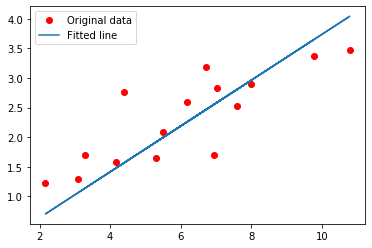

In [50]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# 逻辑回归

In [54]:
# 硬件设置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [56]:
# 参数
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [52]:
# 数据集
train_dataset = torchvision.datasets.MNIST(
    root='datasets',
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)
test_dataset = torchvision.datasets.MNIST(
    root='datasets',
    train=False,
    transform=transforms.ToTensor(),
)

In [53]:
# 数据管道
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
)

In [57]:
# 创建模型
class NetWork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NetWork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
model = NetWork(input_size, hidden_size, num_classes).to(device)    

In [60]:
# 损失函数和优化器
loss = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 训练模型
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # 前向传播
        outputs = model(images)

        # 损失
        l = loss(outputs, labels)

        # 梯度归零
        optimzer.zero_grad()

        # 反向传播
        l.backward()

        # 更新参数
        optimizer.step()

        if (i + 1) % 100 == 0:
            print("Epoch [{}/{}], Step[{}/{}], Loss:{:.4f}".format(
                epoch + 1, num_epochs, i + 1, total_step, l.item()))

Epoch [1/5], Step[100/600], Loss:2.3084
Epoch [1/5], Step[200/600], Loss:2.3019
Epoch [1/5], Step[300/600], Loss:2.3102
Epoch [1/5], Step[400/600], Loss:2.3187
Epoch [1/5], Step[500/600], Loss:2.3130
Epoch [1/5], Step[600/600], Loss:2.2980
Epoch [2/5], Step[100/600], Loss:2.2927
Epoch [2/5], Step[200/600], Loss:2.3061
Epoch [2/5], Step[300/600], Loss:2.3029
Epoch [2/5], Step[400/600], Loss:2.3056
Epoch [2/5], Step[500/600], Loss:2.3078
Epoch [2/5], Step[600/600], Loss:2.3146
Epoch [3/5], Step[100/600], Loss:2.3001
Epoch [3/5], Step[200/600], Loss:2.3082
Epoch [3/5], Step[300/600], Loss:2.3022
Epoch [3/5], Step[400/600], Loss:2.3051
Epoch [3/5], Step[500/600], Loss:2.3030
Epoch [3/5], Step[600/600], Loss:2.3102
Epoch [4/5], Step[100/600], Loss:2.3081
Epoch [4/5], Step[200/600], Loss:2.3049
Epoch [4/5], Step[300/600], Loss:2.3087
Epoch [4/5], Step[400/600], Loss:2.3134
Epoch [4/5], Step[500/600], Loss:2.3087
Epoch [4/5], Step[600/600], Loss:2.3062
Epoch [5/5], Step[100/600], Loss:2.2983


In [ ]:
# 测试模型
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("Accuracy of the network on the 10000 test images: {}%".format(
        100 * correct / total))

# 卷积神经网络

In [69]:
# 创建CNN模型


class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Linear(7 * 7 * 32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out


model = ConvNet(num_classes).to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # 前向计算
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 梯度归零
        optimizer.zero_grad()

        # 反向传播，计算梯度
        loss.backward()

        # 更新梯度
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1279
Epoch [1/5], Step [200/600], Loss: 0.1408
Epoch [1/5], Step [300/600], Loss: 0.0327
Epoch [1/5], Step [400/600], Loss: 0.0621
Epoch [1/5], Step [500/600], Loss: 0.0393
Epoch [1/5], Step [600/600], Loss: 0.0783
Epoch [2/5], Step [100/600], Loss: 0.0343
Epoch [2/5], Step [200/600], Loss: 0.0319
Epoch [2/5], Step [300/600], Loss: 0.1094
Epoch [2/5], Step [400/600], Loss: 0.0315
Epoch [2/5], Step [500/600], Loss: 0.0819
Epoch [2/5], Step [600/600], Loss: 0.0238
Epoch [3/5], Step [100/600], Loss: 0.0184
Epoch [3/5], Step [200/600], Loss: 0.0192
Epoch [3/5], Step [300/600], Loss: 0.0844
Epoch [3/5], Step [400/600], Loss: 0.0182
Epoch [3/5], Step [500/600], Loss: 0.0296
Epoch [3/5], Step [600/600], Loss: 0.0088
Epoch [4/5], Step [100/600], Loss: 0.0256
Epoch [4/5], Step [200/600], Loss: 0.0142
Epoch [4/5], Step [300/600], Loss: 0.0064
Epoch [4/5], Step [400/600], Loss: 0.0159
Epoch [4/5], Step [500/600], Loss: 0.0355
Epoch [4/5], Step [600/600], Loss:

In [72]:
# 验证模型
# eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(
        100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98.87 %


# `RNN`

In [78]:
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0),
                         self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0),
                         self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [79]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/600], Loss: 0.8858
Epoch [1/2], Step [200/600], Loss: 0.1993
Epoch [1/2], Step [300/600], Loss: 0.2062
Epoch [1/2], Step [400/600], Loss: 0.0860
Epoch [1/2], Step [500/600], Loss: 0.1567
Epoch [1/2], Step [600/600], Loss: 0.1580
Epoch [2/2], Step [100/600], Loss: 0.0156
Epoch [2/2], Step [200/600], Loss: 0.2214
Epoch [2/2], Step [300/600], Loss: 0.1073
Epoch [2/2], Step [400/600], Loss: 0.0815
Epoch [2/2], Step [500/600], Loss: 0.1440
Epoch [2/2], Step [600/600], Loss: 0.0486


In [80]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(
        100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.68 %


# 双向`RNN`

In [81]:
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.003


class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            batch_first=True,
                            bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        # 设置初始化参数
        h0 = torch.zeros(self.num_layers * 2, x.size(0),
                         self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0),
                         self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out[:, -1, :])
        return out


model = BiRNN(input_size, hidden_size, num_layers, num_classes).to(device)

In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/600], Loss: 0.8344
Epoch [1/2], Step [200/600], Loss: 0.4673
Epoch [1/2], Step [300/600], Loss: 0.2923
Epoch [1/2], Step [400/600], Loss: 0.0855
Epoch [1/2], Step [500/600], Loss: 0.1698
Epoch [1/2], Step [600/600], Loss: 0.0913
Epoch [2/2], Step [100/600], Loss: 0.1840
Epoch [2/2], Step [200/600], Loss: 0.1190
Epoch [2/2], Step [300/600], Loss: 0.0809
Epoch [2/2], Step [400/600], Loss: 0.1695
Epoch [2/2], Step [500/600], Loss: 0.1514
Epoch [2/2], Step [600/600], Loss: 0.1883


In [83]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(
        100 * correct / total))

Test Accuracy of the model on the 10000 test images: 97.33 %


# 残差网络

In [84]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms


In [86]:
# 指定硬件设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [97]:
# 参数
num_epochs = 40
batch_size = 100
learning_Lrate = 0.001

In [89]:
# 图片预处理
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor(),
])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='datasets',
                                             train=True,
                                             transform=transform,
                                             download=True)
test_dataset = torchvision.datasets.CIFAR10(root='datasets',
                                            train=False,
                                            transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Files already downloaded and verified


In [90]:
# 3*3卷积层
def conv3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels,
                     out_channels,
                     kernel_size=3,
                     stride=stride,
                     padding=1,
                     bias=False)


# 残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [95]:
# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride,
                            downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [98]:
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}".format(
                epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    # Decay learning rate
    if (epoch + 1) % 100 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

Epoch [1/40], Step [100/500] Loss: 1.7607
Epoch [1/40], Step [200/500] Loss: 1.6299
Epoch [1/40], Step [300/500] Loss: 1.4398
Epoch [1/40], Step [400/500] Loss: 1.4820
Epoch [1/40], Step [500/500] Loss: 1.2206
Epoch [2/40], Step [100/500] Loss: 1.1511
Epoch [2/40], Step [200/500] Loss: 1.0539
Epoch [2/40], Step [300/500] Loss: 1.0607
Epoch [2/40], Step [400/500] Loss: 1.0667
Epoch [2/40], Step [500/500] Loss: 1.0571
Epoch [3/40], Step [100/500] Loss: 1.0334
Epoch [3/40], Step [200/500] Loss: 1.0776
Epoch [3/40], Step [300/500] Loss: 0.8903
Epoch [3/40], Step [400/500] Loss: 0.8334
Epoch [3/40], Step [500/500] Loss: 0.9368
Epoch [4/40], Step [100/500] Loss: 0.7313
Epoch [4/40], Step [200/500] Loss: 0.7194
Epoch [4/40], Step [300/500] Loss: 0.5855
Epoch [4/40], Step [400/500] Loss: 0.7459
Epoch [4/40], Step [500/500] Loss: 0.8809
Epoch [5/40], Step [100/500] Loss: 0.7540
Epoch [5/40], Step [200/500] Loss: 0.6130
Epoch [5/40], Step [300/500] Loss: 0.5990
Epoch [5/40], Step [400/500] Loss:

Epoch [39/40], Step [300/500] Loss: 0.1406
Epoch [39/40], Step [400/500] Loss: 0.3536
Epoch [39/40], Step [500/500] Loss: 0.3434
Epoch [40/40], Step [100/500] Loss: 0.0927
Epoch [40/40], Step [200/500] Loss: 0.2798
Epoch [40/40], Step [300/500] Loss: 0.1346
Epoch [40/40], Step [400/500] Loss: 0.1457
Epoch [40/40], Step [500/500] Loss: 0.2270


In [99]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 86.99 %


# 语言模型

In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.nn.utils import clip_grad_norm_

In [21]:
import os


# 处理文本文件辅助类
class Dictionary:
    def __init__(self):
        self.word2index = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2index:
            self.word2index[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __len__(self):
        return len(self.word2index)


class Corpus:
    def __init__(self):
        self.dictionary = Dictionary()
        self.raw_text = []

    def get_data(self, path, batch_size=20):
        # 创建词典
        with open(path, 'r') as f:
            tokens = 0
            for line in f:
                self.raw_text.append(line)

                words = line.split() + ['<eos>']
                tokens += len(words)  # 文本中总单词数量
                for word in words:
                    self.dictionary.add_word(word)
                    
        # 文本向量化
        ids = torch.LongTensor(tokens)
        token = 0

        with open(path, 'r') as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2index[word]
                    token += 1
        num_batches = ids.size(0) // batch_size
        ids = ids[:num_batches * batch_size]
        return ids.view(batch_size, -1)

In [22]:
# 加载文本，并向量化
path = 'datasets/lm.txt'
corpus = Corpus()
ids = corpus.get_data(path)

In [25]:
# 原始文本
print(corpus.raw_text[0])

# 文本向量
print(ids[0][0:15])

print([corpus.dictionary.idx2word[idx.item()] for idx in ids[0][0:15]])

 aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter 

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb']


In [27]:
# 指定硬件
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [31]:
# 参数
embed_size = 128
hidden_size = 1024
num_layers = 1
num_epochs = 5
num_samples = 1000
batch_size = 20
seq_length = 30
learning_rate = 0.001

num_batchs = ids.shape[1] // seq_length
vocab_size=len(corpus.dictionary)

In [33]:
# 基于RNN的语言模型


class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(RNNLM, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size,
                            hidden_size,
                            num_layers,
                            batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, h):
        x = self.embed(x)
        out, (h, c) = self.lstm(x, h)
        out = out.reshape(out.size(0) * out.size(1), out.size(2))
        out = self.linear(out)
        return out, (h, c)

In [34]:
model = RNNLM(vocab_size, embed_size, hidden_size, num_layers).to(device)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [36]:
def detach(states):
    return [state.detach() for state in states]

In [38]:
for epoch in range(num_epochs):
    states = (torch.zeros(num_layers, batch_size, hidden_size).to(device),
              torch.zeros(num_layers, batch_size, hidden_size).to(device))

    for i in range(0, ids.size(1) - seq_length, seq_length):
        inputs = ids[:, i:i + seq_length].to(device)
        targets = ids[:, (i + 1):(i + 1 + seq_length)].to(device)

        states = detach(states)
        outputs, states = model(inputs, states)
        loss = criterion(outputs, targets.reshape(-1))

        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        step = (i + 1) // seq_length
        if step % 500 == 0:
            print(
                "Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.3f}"
                .format(epoch + 1, num_epochs, step, num_batchs, loss.item(),
                        np.exp(loss.item())))

Epoch [1/5], Step [0/1549], Loss: 9.1072, Perplexity: 9020.009
Epoch [1/5], Step [100/1549], Loss: 6.1745, Perplexity: 480.344
Epoch [1/5], Step [200/1549], Loss: 6.0718, Perplexity: 433.448
Epoch [1/5], Step [300/1549], Loss: 5.9661, Perplexity: 389.977
Epoch [1/5], Step [400/1549], Loss: 5.8306, Perplexity: 340.549
Epoch [1/5], Step [500/1549], Loss: 5.3281, Perplexity: 206.043
Epoch [1/5], Step [600/1549], Loss: 5.2820, Perplexity: 196.769
Epoch [1/5], Step [700/1549], Loss: 5.5364, Perplexity: 253.771
Epoch [1/5], Step [800/1549], Loss: 5.2764, Perplexity: 195.657
Epoch [1/5], Step [900/1549], Loss: 5.2341, Perplexity: 187.564
Epoch [1/5], Step [1000/1549], Loss: 5.2817, Perplexity: 196.696
Epoch [1/5], Step [1100/1549], Loss: 5.4569, Perplexity: 234.375
Epoch [1/5], Step [1200/1549], Loss: 5.2746, Perplexity: 195.311
Epoch [1/5], Step [1300/1549], Loss: 5.2142, Perplexity: 183.871
Epoch [1/5], Step [1400/1549], Loss: 4.9683, Perplexity: 143.788
Epoch [1/5], Step [1500/1549], Loss:

In [43]:
with torch.no_grad():
    state = (torch.zeros(num_layers, 1, hidden_size).to(device),
             torch.zeros(num_layers, 1, hidden_size).to(device))
    prob = torch.ones(vocab_size)
    input = torch.multinomial(prob, num_samples=1).unsqueeze(1).to(device)

    for i in range(num_samples):
        output, state = model(input, state)
        prob = output.exp()
        word_id = torch.multinomial(prob, num_samples=1).item()

        word = corpus.dictionary.idx2word[word_id]
        word = '\n' if word == '<eos>' else word + ' '
        